In [1]:
import pandas as pd
import numpy as np


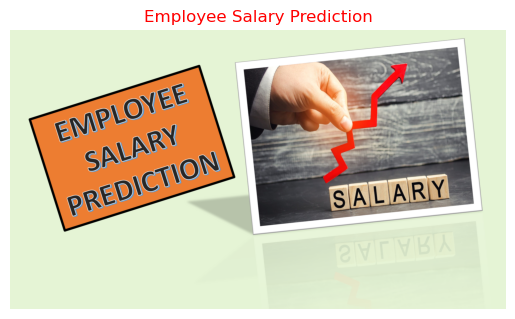

In [103]:
from PIL import Image
img=Image.open("banner.png")
plt.axis(False)
plt.title("Employee Salary Prediction",color="r")
plt.imshow(img)
plt.show()


In [28]:
empdata=pd.read_csv("emp_data.csv")

In [29]:
empdata

,YOE,Age,Education,Company Size,Job Role,Salary
0,2,24,Bachelors,Medium,Software Engineer,20000
1,3,25,Masters,Medium,Software Developer,25000
2,1,23,Bachelors,Small,Software Developer,15000
3,2,24,Masters,Large,Data Scientist,35000
4,4,28,Masters,Medium,Software Engineer,30000
5,5,27,Bachelors,Large,Software Developer,40000
6,3,30,Masters,Large,Software Engineer,38000
7,2,28,Masters,Medium,Data Scientist,40000
8,2,26,Bachelors,Small,Software Developer,16500
9,1,23,Masters,Small,Data Scientist,20000


In [6]:
y=empdata["Salary"]

In [7]:
y

0     20000
1     25000
2     15000
3     35000
4     30000
5     40000
6     38000
7     40000
8     16500
9     20000
10    40000
Name: Salary, dtype: int64

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder = LabelEncoder()

In [12]:
for column in ["Company Size", "Job Role", "Education"]:
    empdata[column] = label_encoder.fit_transform(empdata[column])

In [13]:
empdata

,YOE,Age,Education,Company Size,Job Role,Salary
0,2,24,0,1,2,20000
1,3,25,1,1,1,25000
2,1,23,0,2,1,15000
3,2,24,1,0,0,35000
4,4,28,1,1,2,30000
5,5,27,0,0,1,40000
6,3,30,1,0,2,38000
7,2,28,1,1,0,40000
8,2,26,0,2,1,16500
9,1,23,1,2,0,20000


In [14]:
x=empdata.drop("Salary",axis=1)

In [15]:
x

,YOE,Age,Education,Company Size,Job Role
0,2,24,0,1,2
1,3,25,1,1,1
2,1,23,0,2,1
3,2,24,1,0,0
4,4,28,1,1,2
5,5,27,0,0,1
6,3,30,1,0,2
7,2,28,1,1,0
8,2,26,0,2,1
9,1,23,1,2,0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
model.intercept_

-26597.928436911578

In [19]:
# Predict the test set results
y_pred = model.predict(X_test)

# Compare predictions with actual values
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(predictions)


   Actual     Predicted
5   40000  38948.883508
0   20000  15682.808717
9   20000  19211.326338


In [20]:
X_test

,YOE,Age,Education,Company Size,Job Role
5,5,27,0,0,1
0,2,24,0,1,2
9,1,23,1,2,0


In [21]:
model.predict([[2,25,0,0,1]])

C:\Users\Anurag\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30713.47861178])

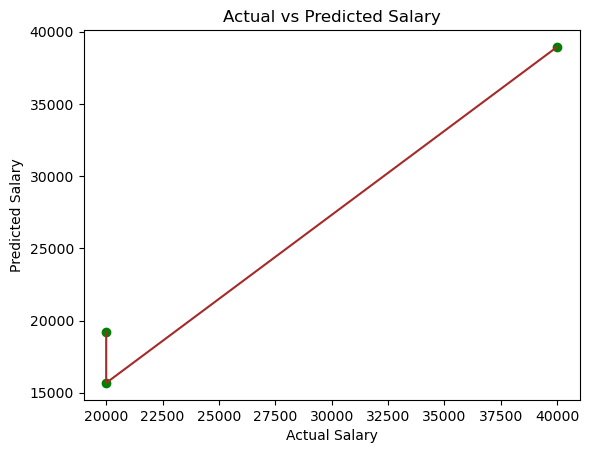

In [22]:
plt.scatter(y_test, y_pred,color="g")
plt.plot(y_test,y_pred,color="brown")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

In [23]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 2052.327145547502
Mean Squared Error: 6788330.866764658
R² Score: 0.9236312777488976


In [24]:
age=empdata["Age"]
yoe=empdata["YOE"]
salary=empdata["Salary"]

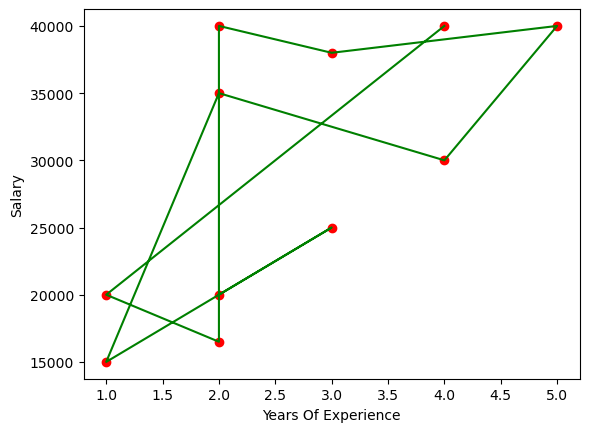

In [25]:
plt.scatter(yoe,salary,color="r")
plt.plot(yoe,salary,color="g")
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")
plt.show()

In [32]:
empdata

,YOE,Age,Education,Company Size,Job Role,Salary
0,2,24,Bachelors,Medium,Software Engineer,20000
1,3,25,Masters,Medium,Software Developer,25000
2,1,23,Bachelors,Small,Software Developer,15000
3,2,24,Masters,Large,Data Scientist,35000
4,4,28,Masters,Medium,Software Engineer,30000
5,5,27,Bachelors,Large,Software Developer,40000
6,3,30,Masters,Large,Software Engineer,38000
7,2,28,Masters,Medium,Data Scientist,40000
8,2,26,Bachelors,Small,Software Developer,16500
9,1,23,Masters,Small,Data Scientist,20000


In [40]:
empdata[(empdata['Company Size']=="Large") & (empdata["Education"]=="Masters")]

,YOE,Age,Education,Company Size,Job Role,Salary
3,2,24,Masters,Large,Data Scientist,35000
6,3,30,Masters,Large,Software Engineer,38000


In [45]:
empdata[empdata["Job Role"].str.startswith("Software")]

,YOE,Age,Education,Company Size,Job Role,Salary
0,2,24,Bachelors,Medium,Software Engineer,20000
1,3,25,Masters,Medium,Software Developer,25000
2,1,23,Bachelors,Small,Software Developer,15000
4,4,28,Masters,Medium,Software Engineer,30000
5,5,27,Bachelors,Large,Software Developer,40000
6,3,30,Masters,Large,Software Engineer,38000
8,2,26,Bachelors,Small,Software Developer,16500
10,4,30,Bachelors,Medium,Software Developer,40000


In [48]:
empdata.query("Age > 25 and Education =='Bachelors' ")

,YOE,Age,Education,Company Size,Job Role,Salary
5,5,27,Bachelors,Large,Software Developer,40000
8,2,26,Bachelors,Small,Software Developer,16500
10,4,30,Bachelors,Medium,Software Developer,40000


In [49]:
empdata.query("YOE > 3  and Age < 30")

,YOE,Age,Education,Company Size,Job Role,Salary
4,4,28,Masters,Medium,Software Engineer,30000
5,5,27,Bachelors,Large,Software Developer,40000


In [58]:
empdata[["Company Size"]].drop_duplicates()

,Company Size
0,Medium
2,Small
3,Large


In [65]:
empdata[['Company Size',"Education","Job Role"]].groupby("Company Size").count()

,Education,Job Role
Company Size,,
Large,3,3
Medium,5,5
Small,3,3


In [88]:
empdata["Education"].value_counts()

Education
Masters      6
Bachelors    5
Name: count, dtype: int64

In [85]:
e=ed.keys()
c=ed.values()

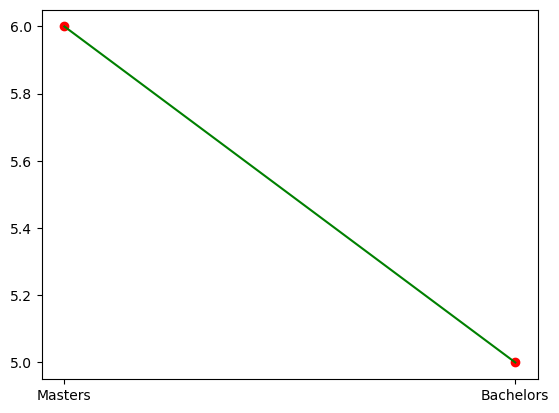

In [104]:
plt.scatter(e,c,color="red")
plt.plot(e,c,color="green")
plt.show()

<BarContainer object of 2 artists>

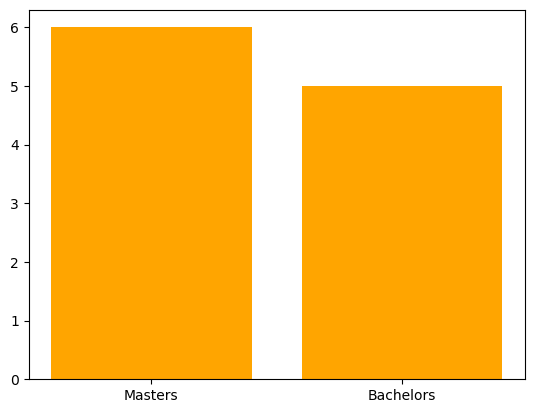

In [92]:
plt.bar(e,c,color="orange")

In [93]:
age=empdata["Age"]
exp=empdata["YOE"]

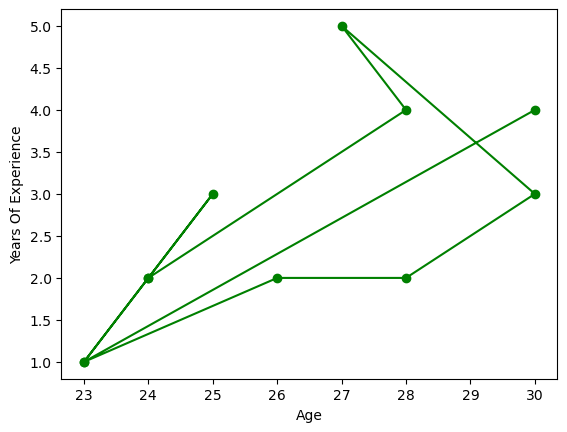

In [101]:
plt.plot(age,exp,"o-g")
plt.xlabel("Age")
plt.ylabel("Years Of Experience")
plt.show()

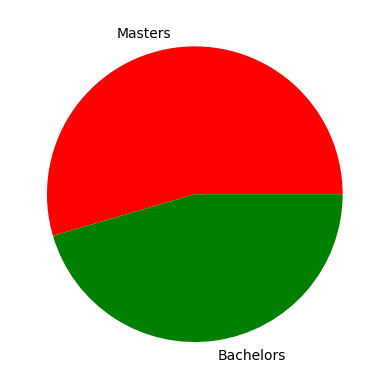

In [102]:
plt.pie(c,labels=e,colors=["red","green"])
plt.show()